# Cats vs Dogs : Image Classification using EfficientNet Workshop

## Load the model

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import keras

In [2]:
from keras.models import load_model

model_dir = "/content/cat_dog_classifier (3).h5"
model_B5 = load_model(model_dir)
height = width = model_B5.input_shape[1]
print(height, width)

224 224


In [5]:
label_dict = {0: 'Cat', 1: 'Dog'}
print(label_dict)

{0: 'Cat', 1: 'Dog'}


In [6]:
def process_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.

    return x

In [7]:
def predict(img_path, model_B5):
    img_x = process_image(img_path)
    predict = model_B5.predict([img_x])
    predict0 = predict[0]
    result = np.argmax(predict0)
    pred_label = label_dict[result]
    pred_prob = predict0[result]

    print(f"[INFO]: Predict Classes ==> {pred_label} With Probability {pred_prob*100:.4f}%")

# Exercise

ทดลองนำภาพ นก รถยนต์ เสือ สิงโต และ สุนัขจิ้งจอก มาทำการทำนายและรายงานผลการทำนายแต่ละภาพ

ขั้นแรก เราจะเขียนฟังก์ชัน Exercise แบบที่เรียกใช้จาก URL ภายนอกได้เพื่อความสะดวก

In [15]:
import requests
from io import BytesIO
from IPython.display import display

def predict_from_url(img_url, model_B5):
  try:
      response = requests.get(img_url, stream=True)
      response.raise_for_status()  # Raise an exception for non-200 status codes

      image_data = BytesIO(response.content)
      img = image.load_img(image_data, target_size=(height, width))

      x = image.img_to_array(img)
      x = x.reshape((1,) + x.shape)
      x /= 255.

      predict = model_B5.predict([x])
      predict0 = predict[0]
      result = np.argmax(predict0)
      pred_label = label_dict[result]
      pred_prob = predict0[result]

      print(f"[INFO]: Predict Classes ==> {pred_label} With Probability {pred_prob*100:.4f}%")

      display(img)

  except requests.exceptions.RequestException as e:
      print(f"Error downloading image: {e}")
  except Exception as e:
      print(f"An error occurred: {e}")

* สิงโต

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
[INFO]: Predict Classes ==> Cat With Probability 77.1710%


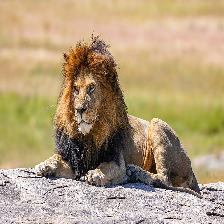

In [16]:
img_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a6/020_The_lion_king_Snyggve_in_the_Serengeti_National_Park_Photo_by_Giles_Laurent.jpg/1200px-020_The_lion_king_Snyggve_in_the_Serengeti_National_Park_Photo_by_Giles_Laurent.jpg"
predict_from_url(img_url, model_B5)

* นก

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
[INFO]: Predict Classes ==> Cat With Probability 98.7827%


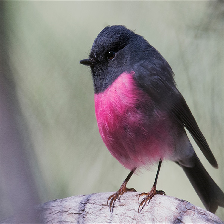

In [17]:
img_url = "https://www.hobartcity.com.au/files/assets/public/v/1/city-services/environment/hobart-bird-walks/hobart-bird-walks.jpg?w=1200"
predict_from_url(img_url, model_B5)

* รถยนต์

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
[INFO]: Predict Classes ==> Cat With Probability 7.3842%


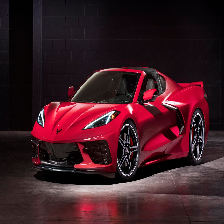

In [18]:
img_url = "https://imageio.forbes.com/specials-images/imageserve/5d35eacaf1176b0008974b54/0x0.jpg?format=jpg&crop=4560,2565,x790,y784,safe&height=900&width=1600&fit=bounds"
predict_from_url(img_url, model_B5)

* เสือ

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
[INFO]: Predict Classes ==> Cat With Probability 99.5205%


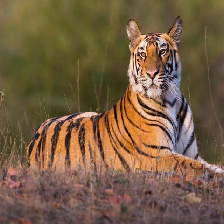

In [19]:
img_url = "https://files.worldwildlife.org/wwfcmsprod/images/Tiger_resting_Bandhavgarh_National_Park_India/hero_small/6aofsvaglm_Medium_WW226365.jpg"
predict_from_url(img_url, model_B5)

* จิ้งจอก

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
[INFO]: Predict Classes ==> Cat With Probability 98.7716%


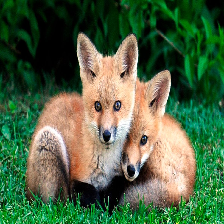

In [20]:
img_url = "https://static.euronews.com/articles/stories/07/76/05/90/1200x675_cmsv2_128f62a0-0c37-548b-a510-98a9435e678b-7760590.jpg"
predict_from_url(img_url, model_B5)

# Exercise

Print output ของ network

In [22]:
# prompt: print the output the weight of the network

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import keras
from keras.models import load_model
import requests
from io import BytesIO
from IPython.display import display

model_dir = "/content/cat_dog_classifier (3).h5"
model_B5 = load_model(model_dir)
height = width = model_B5.input_shape[1]
print(height, width)

# Print the model summary to show the network architecture and weights
model_B5.summary()

224 224


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 5,362,342 (20.46 MB)

 Trainable params: 5,320,317 (20.30 MB)

 Non-trainable params: 42,023 (164.16 KB)

 Optimizer params: 2 (12.00 B)

---

ศวิษฐ์ โกสียอัมพร S0768